In [1]:
import keras

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


- 卷积神经网络 用小样本

#  Train a convent from scratch on a small dataset

In [2]:
import os,shutil

In [4]:
ori_dir='D:/dataset/train'
base_dir='D:/dataset/cd_small'
#os.mkdir(base_dir)


In [6]:

train_dir=os.path.join(base_dir,'train')
#os.mkdir(train_dir)
val_dir=os.path.join(base_dir,'val')
#os.mkdir(val_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)




train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(val_dir, 'cats')
#os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(val_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)
fnames =['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src=os.path.join(ori_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    

fnames =['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src=os.path.join(ori_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print(len(os.listdir(train_cats_dir)))

1000


In [10]:
from keras import layers
from keras import models


In [11]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [12]:
model=models.Sequential()

In [13]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

In [14]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [15]:
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [16]:
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
train_generator=train_data.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=20,class_mode='binary')
validation_generator=train_data.flow_from_directory(val_dir,target_size=(150,150),
                                              batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
history=model.fit_generator(
        train_generator,steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,validation_steps=50)

Epoch 1/20
100/100 [==============================] - 99s 986ms/step - loss: 0.6943 - acc: 0.5230 - val_loss: 0.6823 - val_acc: 0.5670
Epoch 2/20
100/100 [==============================] - 94s 941ms/step - loss: 0.6645 - acc: 0.6135 - val_loss: 0.6494 - val_acc: 0.6280
Epoch 3/20
100/100 [==============================] - 111s 1s/step - loss: 0.6300 - acc: 0.6580 - val_loss: 0.6418 - val_acc: 0.6420
Epoch 4/20
100/100 [==============================] - 105s 1s/step - loss: 0.5850 - acc: 0.7055 - val_loss: 0.6104 - val_acc: 0.6640
Epoch 5/20
100/100 [==============================] - 102s 1s/step - loss: 0.5497 - acc: 0.7235 - val_loss: 0.6682 - val_acc: 0.6210
Epoch 6/20
100/100 [==============================] - 110s 1s/step - loss: 0.5233 - acc: 0.7295 - val_loss: 0.5899 - val_acc: 0.6860
Epoch 7/20
100/100 [==============================] - 106s 1s/step - loss: 0.4833 - acc: 0.7665 - val_loss: 0.5641 - val_acc: 0.7020
Epoch 8/20
100/100 [==============================] - 111s 1s/ste

In [25]:
model.save('cats_and_dogs_small_1.h5')

In [26]:
datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

<Figure size 432x288 with 0 Axes>

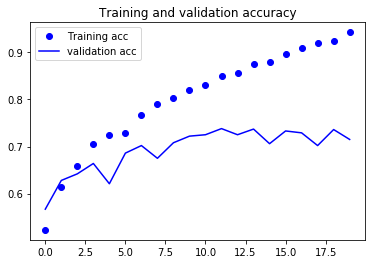

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

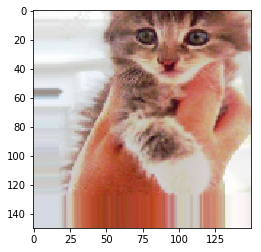

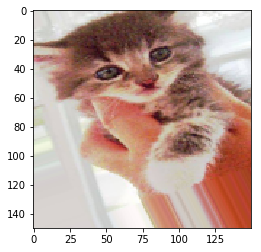

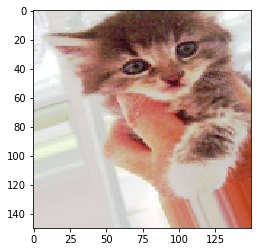

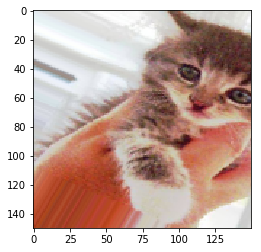

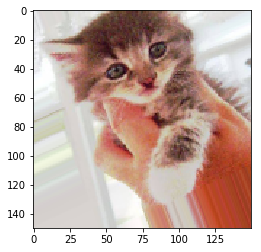

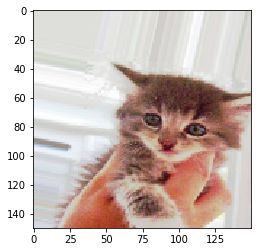

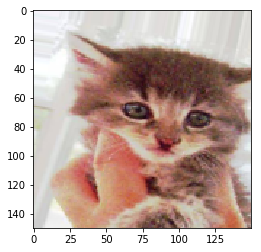

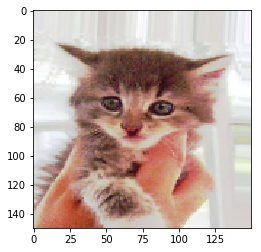

In [27]:
from keras.preprocessingeprocessingeprocessingeprocessing import image
fnames=[os.path.join(train_cats_dir,fname)for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%8==0:
        break
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 169s 2s/step - loss: 0.5694 - acc: 0.6988 - val_loss: 0.5511 - val_acc: 0.7195
Epoch 2/100
100/100 [==============================] - 154s 2s/step - loss: 0.5682 - acc: 0.7003 - val_loss: 0.5436 - val_acc: 0.7236
Epoch 3/100
100/100 [==============================] - 145s 1s/step - loss: 0.5523 - acc: 0.7141 - val_loss: 0.5368 - val_acc: 0.7119
Epoch 4/100
100/100 [==============================] - 159s 2s/step - loss: 0.5455 - acc: 0.7266 - val_loss: 0.5432 - val_acc: 0.7178
Epoch 5/100
100/100 [==============================] - 162s 2s/step - loss: 0.5429 - acc: 0.7203 - val_loss: 0.5570 - val_acc: 0.7138
Epoch 6/100
100/100 [==============================] - 160s 2s/step - loss: 0.5348 - acc: 0.7428 - val_loss: 0.5659 - val_acc: 0.7255
Epoch 7/100
100/100 [==============================] - 154s 2s/step - loss: 0.5454 - acc: 0.7203 - val_loss: 0.5

KeyboardInterrupt: 

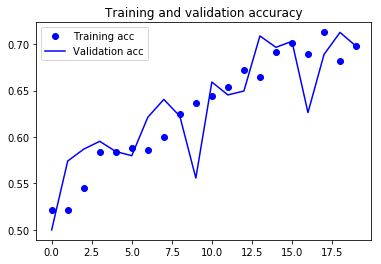

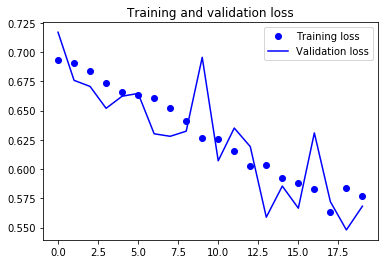

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()